<a href="https://colab.research.google.com/github/Pramodini06/assignment/blob/main/Loan%20Default%20Prediction%20(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('/content/drive/MyDrive/new/Default_Fin.csv')

In [4]:
data.head(5)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [5]:
data['Defaulted?'].value_counts()

,count
Defaulted?,
0,9667
1,333


In [6]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [8]:
data.isnull().sum()

,0
Index,0
Employed,0
Bank Balance,0
Annual Salary,0
Defaulted?,0


Text(0.5, 0, 'Bank Balance')

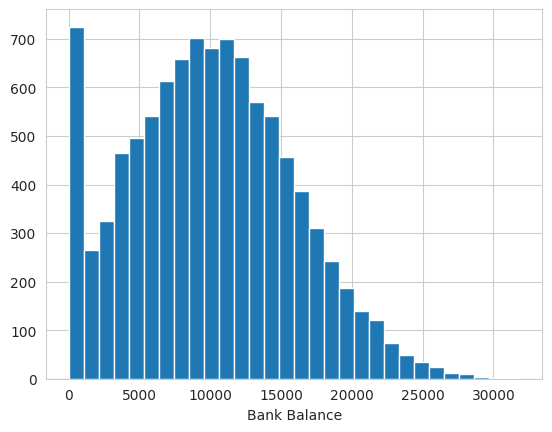

In [9]:
sns.set_style('whitegrid')
data['Bank Balance'].hist(bins=30)
plt.xlabel('Bank Balance')

In [10]:
X = data[['Index', 'Employed', 'Bank Balance','Annual Salary']]
y = data['Defaulted?']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
data.shape

(10000, 5)

In [13]:
X_train.shape,X_test.shape

((8000, 4), (2000, 4))

In [14]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [15]:
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [16]:
predictions = logistic_model.predict(X_test)

In [17]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
logistic_model.score(X_test,y_test)

0.9695

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.63      0.28      0.38        69

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000



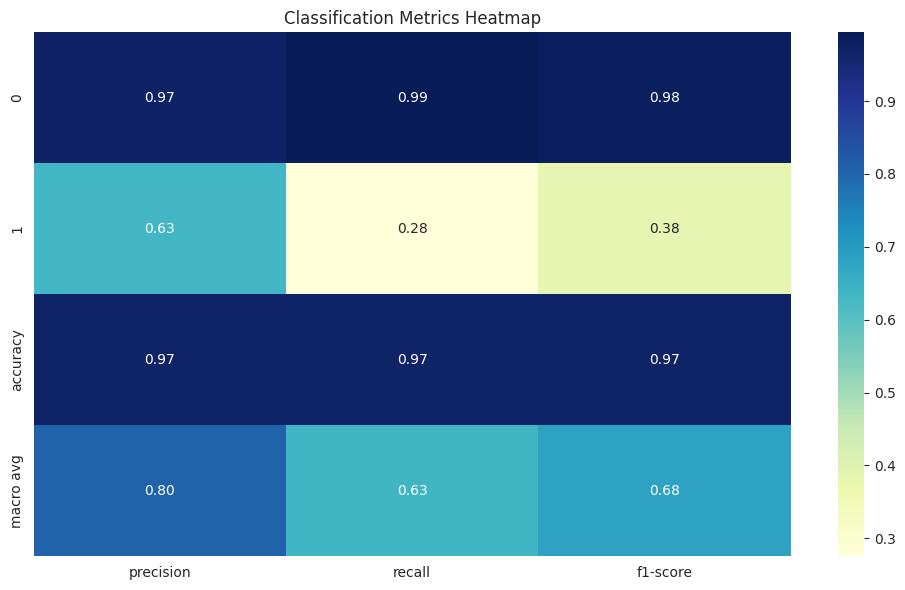

In [20]:
report = classification_report(y_test, predictions, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Metrics Heatmap')
plt.tight_layout()
plt.show()